#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import suptitle
import numpy as np

In [2]:
df = pd.read_csv("E:/Kaggle Datasets/Prima Diabetise Data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### CHECKING NULL-VALUES IN DATA

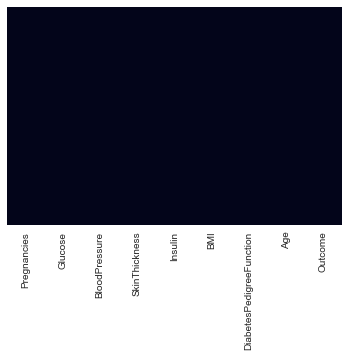

In [7]:
sns.set_style("white")
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
plt.show()

***THERE IS NO NULL VALUES IN OUR DATA

###### CHECKING IF OUR DATA IS IMBALANCE

In [8]:
((len(df[df['Outcome']==1]))/df.shape[0])*100

34.89583333333333

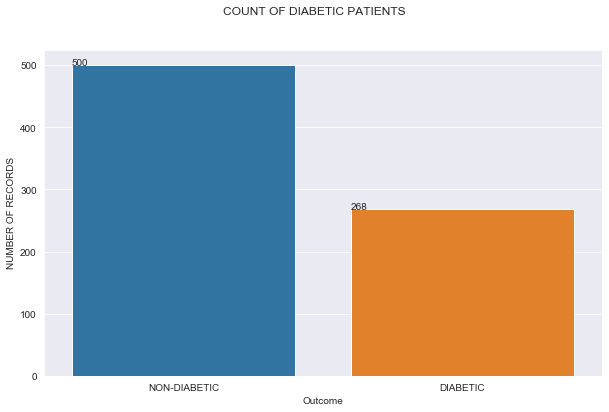

In [9]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
suptitle("COUNT OF DIABETIC PATIENTS")
ax = sns.countplot(df['Outcome'])
ax.set_xticklabels(labels=['NON-DIABETIC',"DIABETIC"])
ax.set_ylabel("NUMBER OF RECORDS")

for p in ax.patches:
    ax.annotate("{}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

#### ANALYSIS OF FEATURES

* <b>GLUCOSE LEVEL</b> - 

<br>
<br>

* A blood sugar level less than 140 mg/dL (7.8 mmol/L) is <b>Normal</b>
<br>
<br>
* A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates <b>Diabetes</b>
<br>
<br>
* A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates <b>Pre-Diabetes</b>

<br>
<br>

Normal blood sugar levels are less than 100 mg/dL after not eating (fasting) for at least eight hours.
<br>

And they're less than 140 mg/dL two hours after eating.
<br>


During the day, levels tend to be at their lowest just before meals.
<br>

For most people without diabetes, blood sugar levels before meals hover around 70 to 80 mg/dL.
<br>

For some people, 60 is normal; for others, 90 is the norm.


<br>
* SOURCE --> https://www.webmd.com/diabetes/qa/what-are-normal-blood-sugar-levels


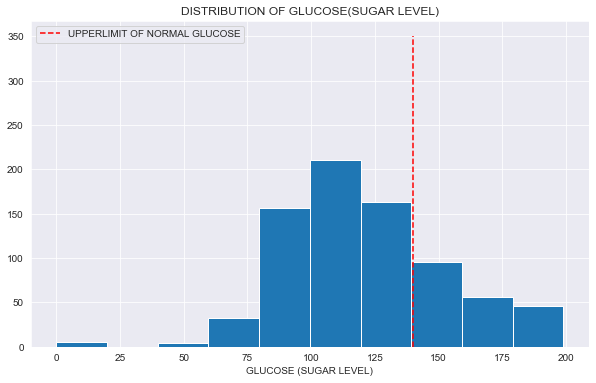

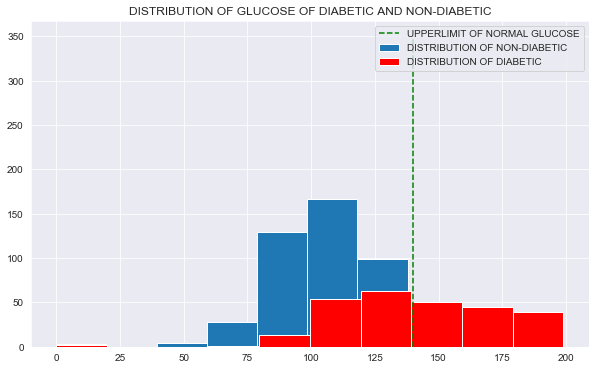

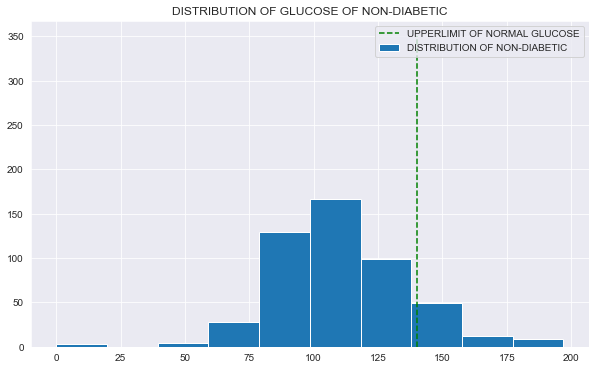

In [10]:
plt.figure(figsize=(10,6))
plt.title("DISTRIBUTION OF GLUCOSE(SUGAR LEVEL)")
plt.xlabel("GLUCOSE (SUGAR LEVEL)")
plt.vlines(x=140,ymin=0,ymax=350,linestyle='--',color='r')
df['Glucose'].hist()

plt.legend(labels=['UPPERLIMIT OF NORMAL GLUCOSE'],loc='upper left')
plt.show()

## BIFIRCATED GRAPH
plt.figure(figsize=(10,6))
plt.title("DISTRIBUTION OF GLUCOSE OF DIABETIC AND NON-DIABETIC")
df[df['Outcome']==0]['Glucose'].hist()
df[df['Outcome']==1]['Glucose'].hist(color='r')
plt.vlines(x=140,ymin=0,ymax=350,linestyle='--',color='g')

plt.legend(labels=["UPPERLIMIT OF NORMAL GLUCOSE","DISTRIBUTION OF NON-DIABETIC","DISTRIBUTION OF DIABETIC"])
plt.show()

###
plt.figure(figsize=(10,6))
plt.title("DISTRIBUTION OF GLUCOSE OF NON-DIABETIC")
df[df['Outcome']==0]['Glucose'].hist()
plt.vlines(x=140,ymin=0,ymax=350,linestyle='--',color='g')

plt.legend(labels=["UPPERLIMIT OF NORMAL GLUCOSE","DISTRIBUTION OF NON-DIABETIC","DISTRIBUTION OF DIABETIC"])
plt.show()

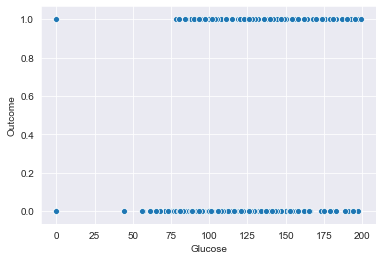

In [11]:
sns.scatterplot(df['Glucose'],df['Outcome'])
plt.show()

* <b>BMI</b> - 

<br>
<br>
* For most adults, an ideal BMI is in the 18.5 to 24.9 range
<br>
<br>
* For children and young people aged 2 to 18
<br>
<br>
For type 2 diabetes, this includes being overweight or obese (having a body mass index – BMI – of 30 or greater)
<br>
<br>

SOURCE --- > https://www.diabetes.co.uk/diabetes-and-obesity.html#:~:text=Links%20between%20obesity%20and%20type,%E2%80%93%20of%2030%20or%20greater).

C:\Users\paddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


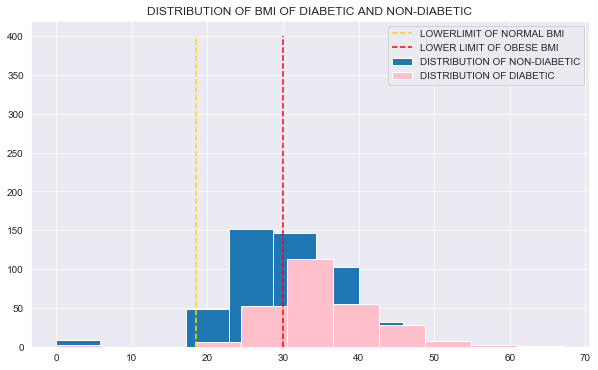

In [12]:
'''plt.figure(figsize=(10,6))
plt.title("DISTRIBUTION OF BMI")
plt.xlabel("BMI  (BODY MASS INDEX)")
ax = df['BMI'].hist()
plt.vlines(x=18.5,ymin=0,ymax=400,linestyle='--',color='gold')
plt.vlines(x=30,ymin=0,ymax=400,linestyle='--',color='R')


plt.legend(labels=["LOWER NORMAL BMI (18.5-25.9)",'LOWERLIMIT BMI OF OBESE'])
plt.show()
'''
## DISTRIBUTION OF BMI BIFIRCATED
plt.figure(figsize=(10,6))
plt.title("DISTRIBUTION OF BMI OF DIABETIC AND NON-DIABETIC")
df[df['Outcome']==0]['BMI'].hist()
df[df['Outcome']==1]['BMI'].hist(color='pink',bins=11)
plt.vlines(x=18.5,ymin=0,ymax=400,linestyle='--',color='gold')
plt.vlines(x=30,ymin=0,ymax=400,linestyle='--',color='R')

plt.legend(labels=["LOWERLIMIT OF NORMAL BMI","LOWER LIMIT OF OBESE BMI","DISTRIBUTION OF NON-DIABETIC","DISTRIBUTION OF DIABETIC"])
plt.show()


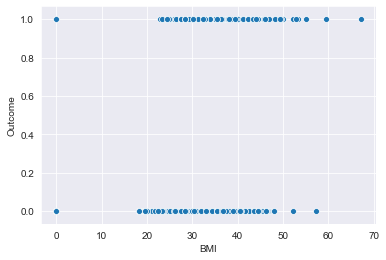

In [13]:
sns.scatterplot(df['BMI'],df['Outcome'])
plt.show()

In [14]:
print("PATIENTS WITH BMI > 25(UPPER LIMIT OF NORMAL BMI) AND DIABETIC OUT OF TOTAL DIABETIC SAMPLES ARE -- > ",len(df[(df['BMI']>25) & (df['Outcome']==1)])/len(df[df['Outcome']==1]))

PATIENTS WITH BMI > 25(UPPER LIMIT OF NORMAL BMI) AND DIABETIC OUT OF TOTAL DIABETIC SAMPLES ARE -- >  0.9664179104477612


In [15]:
print("PATIENTS WITH BMI > 25(UPPER LIMIT OF NORMAL BMI) AND NORMAL OUT OF TOTAL NORMAL SAMPLES ARE -- > ",len(df[(df['BMI']>25) & (df['Outcome']==0)])/len(df[df['Outcome']==0]))

PATIENTS WITH BMI > 25(UPPER LIMIT OF NORMAL BMI) AND NORMAL OUT OF TOTAL NORMAL SAMPLES ARE -- >  0.772


* <b>Age</b> - 
<br>
<br>
- You can develop type 2 diabetes at any age, even during childhood
<br>
<br>
- However, type 2 diabetes occurs most often in middle-aged and older people
<br>
<br>


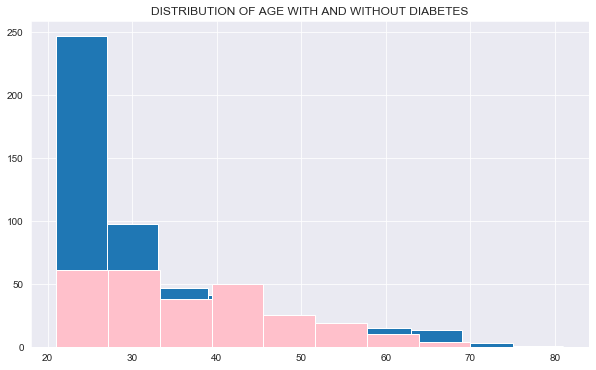

In [16]:
plt.figure(figsize=(10,6))
plt.title("DISTRIBUTION OF AGE WITH AND WITHOUT DIABETES")
df[df['Outcome']==0]['Age'].hist(bins=10,figsize=(10,6))
df[df['Outcome']==1]['Age'].hist(color="pink",bins=8,figsize=(10,6))
plt.show()

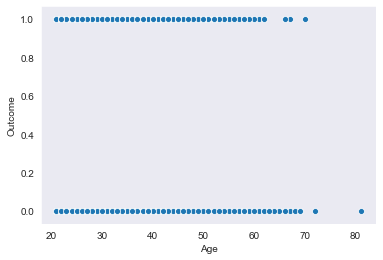

In [17]:
sns.set_style("dark")
sns.scatterplot(df['Age'],df['Outcome'])
plt.show()

* <b>INSULIN</b> - 
<br>
<br>
* People with type 2 diabetes don't use insulin efficiently (insulin resistance) and don't produce enough insulin (insulin deficiency)
<br>
<br>


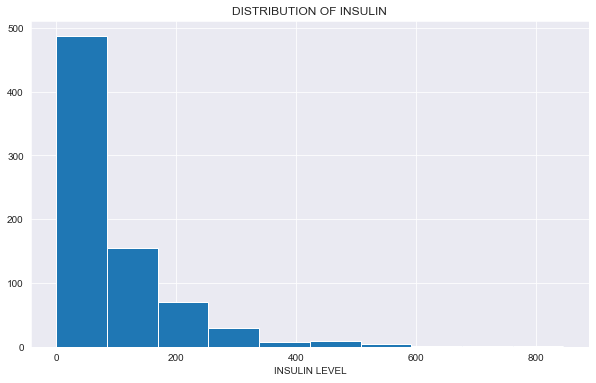

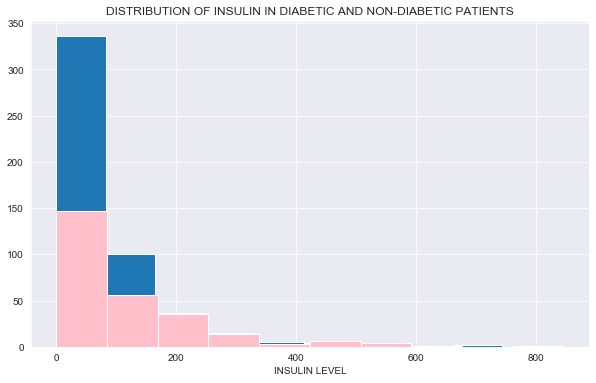

In [18]:
plt.figure(figsize=(10,6))

plt.title("DISTRIBUTION OF INSULIN")
plt.xlabel("INSULIN LEVEL")
df['Insulin'].hist()
plt.show()



### BIFERCATION HISTOGRAM
plt.figure(figsize=(10,6))
plt.title("DISTRIBUTION OF INSULIN IN DIABETIC AND NON-DIABETIC PATIENTS")
plt.xlabel("INSULIN LEVEL")
df[df["Outcome"]==0]["Insulin"].hist(bins=9)
df[df['Outcome']==1]["Insulin"].hist(color="pink")
plt.show()

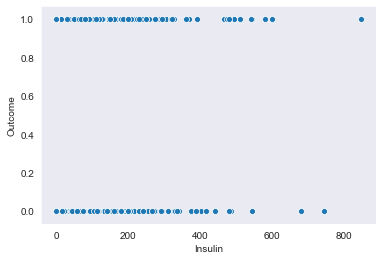

In [19]:
sns.scatterplot(df['Insulin'],df['Outcome'])
plt.show()

* <b>SKIN THICKNESS</b> - 
<br>
<br>
* The standard normal values for triceps skinfolds are<b> 2.5mm (men)</b>
<br<
<br>
<b>18.0mm (women) or about 30% </b>
<br>
<br>
Values over 20mm (men) and 30mm (women) represent about the 85th percentile, and can be considered as obese. 
<br>
<br>
	



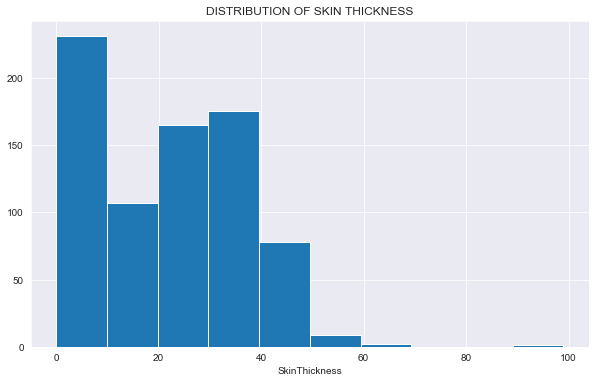

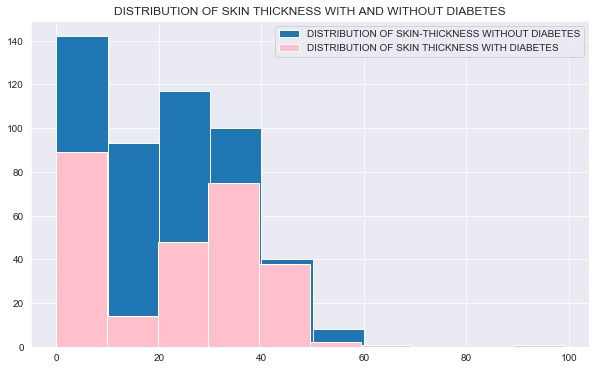

In [20]:
plt.figure(figsize=(10,6))
plt.xlabel("SkinThickness")
plt.title("DISTRIBUTION OF SKIN THICKNESS")
df["SkinThickness"].hist()
plt.show()


### DISTINGUISHED DISTRIBUTION
plt.figure(figsize=(10,6))
plt.title("DISTRIBUTION OF SKIN THICKNESS WITH AND WITHOUT DIABETES")

df[df["Outcome"]==0]['SkinThickness'].hist(bins=6)
df[df["Outcome"]==1]["SkinThickness"].hist(color="pink")

plt.legend(labels=["DISTRIBUTION OF SKIN-THICKNESS WITHOUT DIABETES","DISTRIBUTION OF SKIN THICKNESS WITH DIABETES"])
plt.show()

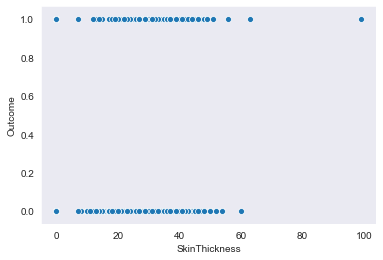

In [21]:
sns.scatterplot(df['SkinThickness'],df['Outcome'])
plt.show()

* <B>BLOOD PRESSURE</B> - 
<br>
<br>
LOW --- > LESS THAN 90(60 mm/Hg)
<BR>
<BR>
NORMAL -- > BETWEEN 90(60 mm/Hg) TO 120(80 mm/Hg)
<BR>
<BR>
HIGH-PRESSURE --- > 140(90 mm/Hg) OR HIGHER

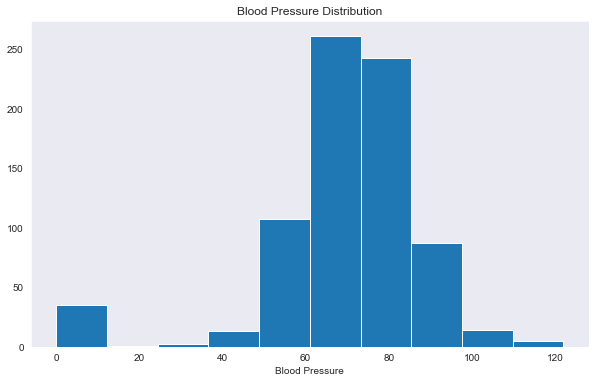

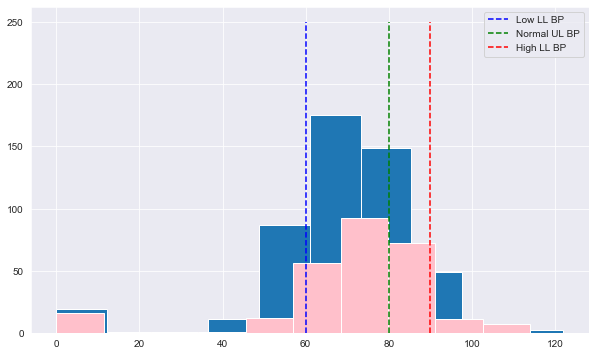

In [22]:
plt.figure(figsize=(10,6))
plt.title("Blood Pressure Distribution")
plt.xlabel("Blood Pressure")
plt.hist(df['BloodPressure'])
plt.show()


plt.figure(figsize=(10,6))
df[df["Outcome"]==0]["BloodPressure"].hist()
df[df["Outcome"]==1]['BloodPressure'].hist(color='pink',bins=10)
plt.vlines(x=60,ymin=0,ymax=250,linestyle="--",label="Low LL BP",color="blue")
plt.vlines(x=80,ymin=0,ymax=250,linestyle="--",label="Normal UL BP",color='green')
plt.vlines(x=90,ymin=0,ymax=250,linestyle="--",label="High LL BP",color='red')

plt.legend()
plt.show()





plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
##### IS THERE A RELATION BETWEEN AGE AND OTHER FACTORS ?

In [25]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

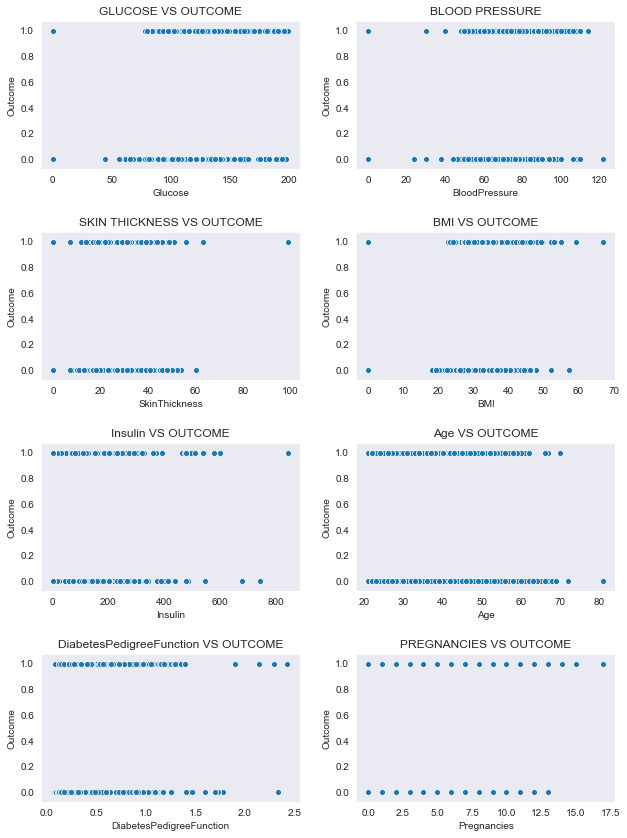

In [26]:
fig,axes = plt.subplots(4,2,figsize=(9,12))

axes[0,0].set_title("GLUCOSE VS OUTCOME")
sns.scatterplot(df['Glucose'],df['Outcome'],ax=axes[0,0])

axes[0,1].set_title("BLOOD PRESSURE")
sns.scatterplot(df['BloodPressure'],df['Outcome'],ax=axes[0,1])

axes[1,0].set_title("SKIN THICKNESS VS OUTCOME")
sns.scatterplot(df['SkinThickness'],df['Outcome'],ax=axes[1,0])

axes[1,1].set_title("BMI VS OUTCOME")
sns.scatterplot(df['BMI'],df['Outcome'],ax=axes[1,1])

axes[2,0].set_title("Insulin VS OUTCOME")
sns.scatterplot(df['Insulin'],df['Outcome'],ax=axes[2,0])

axes[2,1].set_title("Age VS OUTCOME")
sns.scatterplot(df['Age'],df['Outcome'],ax=axes[2,1])

axes[3,0].set_title("DiabetesPedigreeFunction VS OUTCOME")
sns.scatterplot(df['DiabetesPedigreeFunction'],df['Outcome'],ax=axes[3,0])

axes[3,1].set_title("PREGNANCIES VS OUTCOME")
sns.scatterplot(df['Pregnancies'],df['Outcome'],ax=axes[3,1])

plt.tight_layout(pad=2)
plt.show()

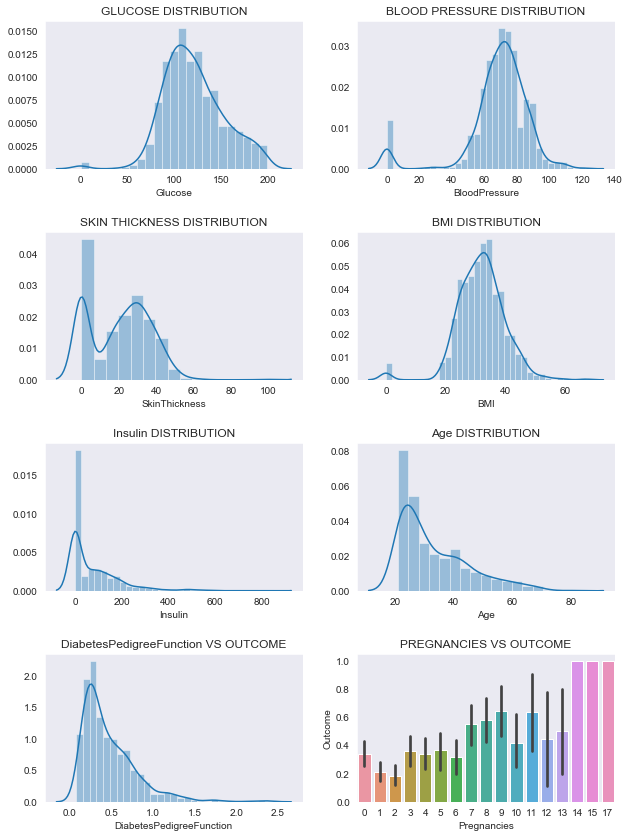

In [27]:
fig,axes = plt.subplots(4,2,figsize=(9,12))

axes[0,0].set_title("GLUCOSE DISTRIBUTION")
sns.distplot(df['Glucose'],ax=axes[0,0])

axes[0,1].set_title("BLOOD PRESSURE DISTRIBUTION")
sns.distplot(df['BloodPressure'],ax=axes[0,1])

axes[1,0].set_title("SKIN THICKNESS DISTRIBUTION")
sns.distplot(df['SkinThickness'],ax=axes[1,0])

axes[1,1].set_title("BMI DISTRIBUTION")
sns.distplot(df['BMI'],ax=axes[1,1])

axes[2,0].set_title("Insulin DISTRIBUTION")
sns.distplot(df['Insulin'],ax=axes[2,0])

axes[2,1].set_title("Age DISTRIBUTION")
sns.distplot(df['Age'],ax=axes[2,1])

axes[3,0].set_title("DiabetesPedigreeFunction VS OUTCOME")
sns.distplot(df['DiabetesPedigreeFunction'],ax=axes[3,0])

axes[3,1].set_title("PREGNANCIES VS OUTCOME")
sns.barplot(df['Pregnancies'],df['Outcome'],ax=axes[3,1])

plt.tight_layout(pad=2)
plt.show()

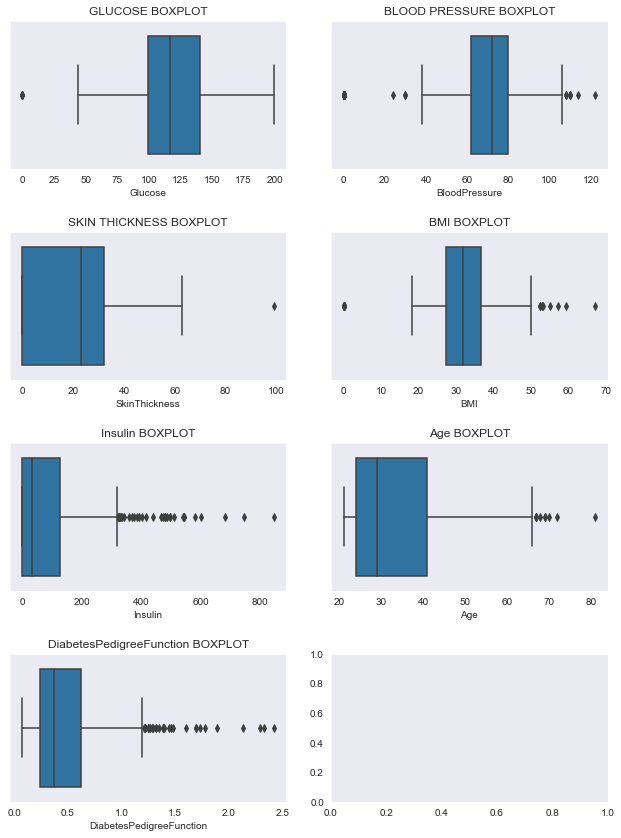

In [28]:
fig,axes = plt.subplots(4,2,figsize=(9,12))

sns.set_style("darkgrid")

axes[0,0].set_title("GLUCOSE BOXPLOT")
sns.boxplot(df['Glucose'],ax=axes[0,0])

axes[0,1].set_title("BLOOD PRESSURE BOXPLOT")
sns.boxplot(df['BloodPressure'],ax=axes[0,1])

axes[1,0].set_title("SKIN THICKNESS BOXPLOT")
sns.boxplot(df['SkinThickness'],ax=axes[1,0])

axes[1,1].set_title("BMI BOXPLOT")
sns.boxplot(df['BMI'],ax=axes[1,1])

axes[2,0].set_title("Insulin BOXPLOT")
sns.boxplot(df['Insulin'],ax=axes[2,0])

axes[2,1].set_title("Age BOXPLOT")
sns.boxplot(df['Age'],ax=axes[2,1])

axes[3,0].set_title("DiabetesPedigreeFunction BOXPLOT")
sns.boxplot(df['DiabetesPedigreeFunction'],ax=axes[3,0])


plt.tight_layout(pad=2)
plt.show()

#### FEATURE SELECTION

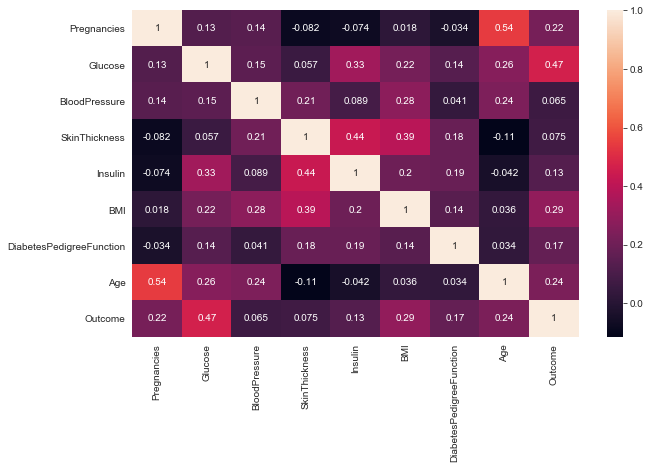

In [34]:
plt.figure(figsize=(10,6))
sns.set_style('dark')
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [32]:
from sklearn.ensemble import ExtraTreesRegressor

In [36]:
Y = df['Outcome']
X = df.drop(columns=['Outcome'],inplace=False)

In [35]:
model = ExtraTreesRegressor()

In [37]:
model.fit(X,Y)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [38]:
s = pd.Series(model.feature_importances_,X.columns)

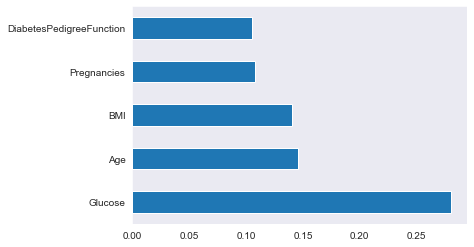

In [40]:
s.nlargest(5).plot(kind='barh')
plt.show()

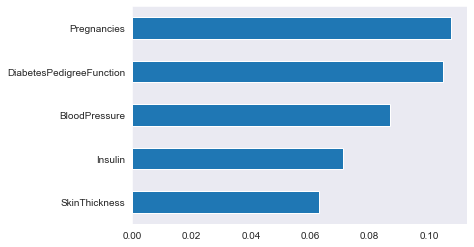

In [42]:
s.nsmallest(5).plot(kind='barh')
plt.show()

#### BALAANCING THE DATASET

In [4]:
from sklearn.utils import resample

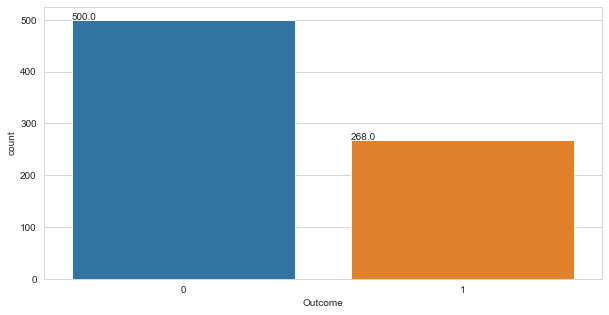

In [10]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(df['Outcome'])

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

In [6]:
df_minor = df[df['Outcome']==1]
df_major = df[df["Outcome"]==0]

df_minor_upsampled = resample(df_minor,n_samples=500,replace=True,random_state=11)

df_upsampled = pd.concat([df_major,df_minor_upsampled])

In [7]:
X = df_upsampled.drop(columns=['Outcome'],inplace=False)
Y = df_upsampled['Outcome']

###### MODELLING

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=1)

In [14]:
log_r = LogisticRegression()

In [15]:
log_r.fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
log_r.score(X_train,Y_train)

0.74375

In [17]:
log_r.score(X_test,Y_test)

0.74

In [18]:
pred = log_r.predict(X_test)

In [19]:
print("Precision -- > ",precision_score(Y_test,pred))
print("Accuracy --- > ",accuracy_score(Y_test,pred))
print("Recall   --- > ",recall_score(Y_test,pred))

Precision -- >  0.7708333333333334
Accuracy --- >  0.74
Recall   --- >  0.7115384615384616


In [100]:
roc_auc_score(Y_test,pred)

0.7411858974358975

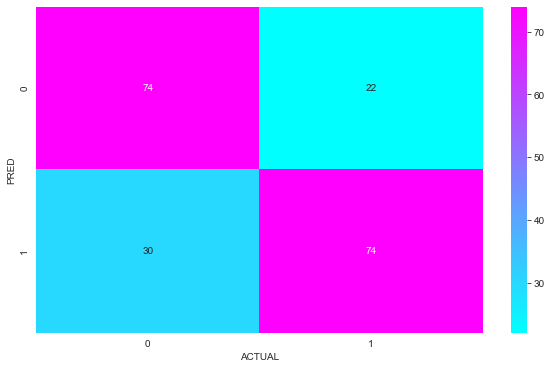

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,pred),annot=True,fmt='d',cmap='cool')
plt.xlabel("ACTUAL")
plt.ylabel("PRED")
plt.show()

#### RANDOM FOREST CLASSIFIER

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc = RandomForestClassifier()

###### HYPER-PARAMETER TUNING

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
# NUMBER OF ESTIMATORS
n_estimators = [int(x) for x in np.linspace(start=10,stop=100,num=10)]
# MAX DEPTH OF THE TREES
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
# MIN_SMAPLES_SPLIT
min_samples_split = [int(x) for x in np.linspace(start=100,stop=500,num=5)]
# MAX FEATURES
max_features = ['auto','sqrt']

In [91]:
params = {"n_estimators":n_estimators,
         "max_depth":max_depth,
         "min_samples_split":min_samples_split,
         "max_features":max_features}

In [93]:
model = RandomizedSearchCV(param_distributions=params,estimator=rfc,n_jobs=1,verbose=2,cv=5,n_iter=10)

In [94]:
model.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30, total=   0.2s
[CV] n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30 
[CV]  n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30, total=   0.2s
[CV] n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30 
[CV]  n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30, total=   0.2s
[CV] n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30 
[CV]  n_estimators=90, min_samples_split=300, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=70, min_samples_split=100, max_features=sqrt, max_depth=20 
[CV]  n_estimators=70, min_samples_split=100, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=70, min_samples_split=100, max_features=sqrt, max_depth=20 
[CV]  n_estimators=70, min_samples_split=100, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=70, min_samples_split=100, max_fea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [95]:
model.best_params_

{'n_estimators': 70,
 'min_samples_split': 100,
 'max_features': 'sqrt',
 'max_depth': 20}

In [96]:
del rfc

In [93]:
rfc = RandomForestClassifier(n_estimators=70,min_samples_split=100,max_features='sqrt',max_depth=20)

In [94]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
rfc.score(X_train,Y_train)

0.82375

In [96]:
rfc.score(X_test,Y_test)

0.77

In [97]:
pred2 = rfc.predict(X_test)

In [98]:
print("Precision -- > ",precision_score(Y_test,pred2))
print("Accuracy --- > ",accuracy_score(Y_test,pred2))
print("Recall   --- > ",recall_score(Y_test,pred2))

Precision -- >  0.7735849056603774
Accuracy --- >  0.77
Recall   --- >  0.7884615384615384


In [99]:
roc_auc_score(Y_test,pred2)

0.7692307692307692

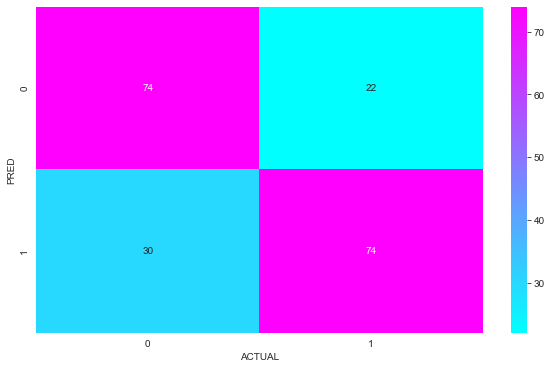

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,pred),annot=True,fmt='d',cmap='cool')
plt.xlabel("ACTUAL")
plt.ylabel("PRED")
plt.show()

###### SVM

In [22]:
from sklearn.svm import SVC

In [76]:
del sv

In [65]:
gammas=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
train_fit = []
test_fit = []


for gamma in gammas:
    sv = SVC(gamma=gamma).fit(X_train,Y_train)
    train_fit.append(sv.score(X_train,Y_train))
    test_fit.append(sv.score(X_test,Y_test))
    del sv

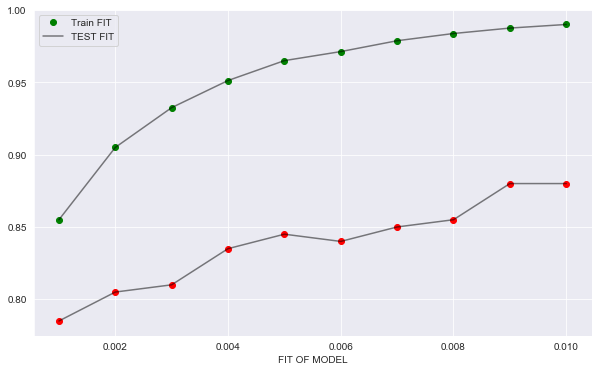

In [70]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.xlabel("FIT OF MODEL")
plt.plot(gammas,train_fit,'o',color='g')
plt.plot(gammas,train_fit,'-',color='black',alpha=0.5)

plt.plot(gammas,test_fit,'o',color='r')
plt.plot(gammas,test_fit,'-',alpha=0.5,color='black')

plt.legend(['Train FIT',"TEST FIT"])
plt.show()

In [77]:
sv = SVC(gamma=0.002).fit(X_train,Y_train)

In [78]:
sv.score(X_train,Y_train)

0.905

In [86]:
sv.score(X_test,Y_test)

0.805

In [79]:
predictions = sv.predict(X_test)

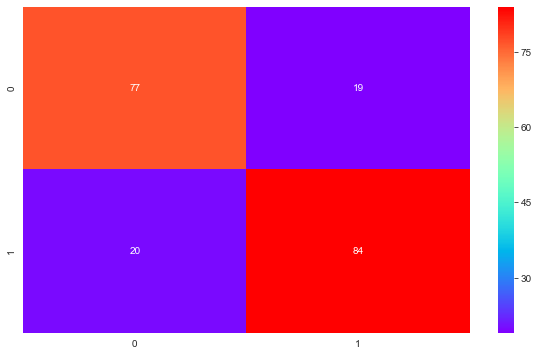

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,predictions),annot=True,cmap='rainbow')
plt.show()

In [85]:
print("Precision -- > ",precision_score(Y_test,predictions))
print("Accuracy --- > ",accuracy_score(Y_test,predictions))
print("Recall   --- > ",recall_score(Y_test,predictions))

Precision -- >  0.8155339805825242
Accuracy --- >  0.805
Recall   --- >  0.8076923076923077


In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
roc_auc_score(Y_test,predictions)

0.8048878205128205

###### TP

In [117]:
df_tp = df.copy()

In [121]:
df_tp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
X_tp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [119]:
X_tp = df_tp.drop(columns=['Outcome'],inplace=False)

In [143]:
predss = log_r.predict(X_tp)

In [130]:
probs = np.ndarray.flatten(log_r.predict_proba(X_tp))

In [145]:
df_tp['Pred'] = predss

In [148]:
df_tp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [151]:
probs = list(probs)

In [161]:
df_tp['Prob of 0'] = probs[::2]
df_tp['Prob of 1'] = probs[1::2]

In [162]:
df_tp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,Prob of 0,Prob of 1
0,6,148,72,35,0,33.6,0.627,50,1,1,0.205207,0.794793
1,1,85,66,29,0,26.6,0.351,31,0,0,0.844269,0.155731
2,8,183,64,0,0,23.3,0.672,32,1,1,0.184878,0.815122
3,1,89,66,23,94,28.1,0.167,21,0,0,0.868006,0.131994
4,0,137,40,35,168,43.1,2.288,33,1,1,0.090071,0.909929
5,5,116,74,0,0,25.6,0.201,30,0,0,0.721765,0.278235
6,3,78,50,32,88,31.0,0.248,26,1,0,0.801547,0.198453
7,10,115,0,0,0,35.3,0.134,29,0,1,0.246808,0.753192
8,2,197,70,45,543,30.5,0.158,53,1,1,0.156061,0.843939
9,8,125,96,0,0,0.0,0.232,54,1,0,0.869449,0.130551
